In [5]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import sympy as sp
from IPython.display import *
import scipy

s='''
9.974   8.769  11.169   6.089   9.497  10.914  17.721   8.847  13.410  7.966
 2.097   7.470   7.498  15.914   9.336  13.731  12.941  11.747   6.995  23.857
 7.943   6.636   8.725   9.728   6.427   8.422   4.367  20.900   8.030  9.831
 9.369   9.933   8.242   4.476   7.178  11.306  11.095  14.297  12.923  22.787
 5.911  19.797   6.734   6.024   6.086   8.644  13.809   6.906   6.339  6.228
13.436   9.803  13.899   3.473  13.693   6.658   3.544  14.835   8.934  12.180
 7.366  14.966  11.168   7.616   5.919   4.987   9.858  14.669   9.285  13.856
 4.873  10.896   7.461   7.497   7.088   7.122   8.463   9.898  15.343  3.870
 8.198   6.425  17.598  12.493   8.655  10.662  14.056   8.354  11.957  22.368
18.069   8.902   7.868  10.460   2.759  10.486   5.042   8.146   3.510  6.876
10.082   6.567  14.522  11.860   3.998  15.943   7.685  12.459   5.407  9.684
 6.562   4.830  12.677  14.424   9.893   7.860  19.988  15.974  11.315  10.337
 '''
alfa = 0.05

xx=[float(i) for i in s.split()]

Задача 8

Гусейнов М.А ФН11-53б

Вариант 8

### Задание 
#### 1. Используя группированную выборку из задачи 1, проверьте на уровне 1 − α гипотезу H0 : выборка взята из генеральной совокупности, распределённой по закону $\chi^2(n) $, α = 0.05 
#### 2. Неизвестные параметры распределения оценить методом моментов или методом максимального правдоподобия
#### 3. Постройте совмещённые графики гистограммы относительных частот и плотности, соответствующей функции распределения F(x)

### Решение

#### Выведем выборку:

In [6]:
pd.DataFrame(np.reshape(xx,(12,10)))

,0,1,2,3,4,5,6,7,8,9
0,9.974,8.769,11.169,6.089,9.497,10.914,17.721,8.847,13.410,7.966
1,2.097,7.470,7.498,15.914,9.336,13.731,12.941,11.747,6.995,23.857
2,7.943,6.636,8.725,9.728,6.427,8.422,4.367,20.900,8.030,9.831
3,9.369,9.933,8.242,4.476,7.178,11.306,11.095,14.297,12.923,22.787
4,5.911,19.797,6.734,6.024,6.086,8.644,13.809,6.906,6.339,6.228
5,13.436,9.803,13.899,3.473,13.693,6.658,3.544,14.835,8.934,12.180
6,7.366,14.966,11.168,7.616,5.919,4.987,9.858,14.669,9.285,13.856
7,4.873,10.896,7.461,7.497,7.088,7.122,8.463,9.898,15.343,3.870
8,8.198,6.425,17.598,12.493,8.655,10.662,14.056,8.354,11.957,22.368
9,18.069,8.902,7.868,10.460,2.759,10.486,5.042,8.146,3.510,6.876


#### Оценка параметров

In [7]:
xx=np.array(xx)
omega =max(xx)-min(xx)

xm =np.average(xx)
print('Выборочное среднее:',round(xm,5) )

Выборочное среднее: 10.02202


$n = \overline{X}$

#### По правилу Стёрджеса определим количество интервалов, разобьём отрезок на интервалы

Количество интервалов:7
[ 2.097       5.20557143  8.31414286 11.42271429 14.53128571 17.63985714
 20.74842857 23.857     ]


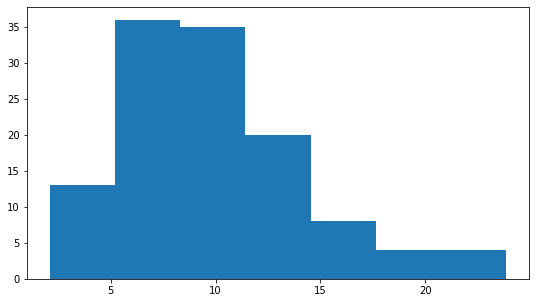

In [66]:
l= math.trunc(1+math.log(120,2))
h = omega/l
size = 120
print("Количество интервалов:" + str(l))
plt.figure(figsize=(9,5))
out=plt.hist(xx,l)
print(out[1])

#### Подсчитаем эмпирические частоты и теоретические вероятности:

In [67]:
p = lambda x: sc.chi2.pdf(x,xm)
probs = np.array([p(out[1][i] + h/2) for i in range(len(out[1])-1)])
intervals = ["("+str(round(out[1][i-1],3))+";"+str(round(out[1][i],3))+"]" for i in range(1, len(out[1]))]

pd.DataFrame([out[0], (h*size*probs).round(3)],["Эмпирические частоты:","Теоретические частоты:"],intervals)

,(2.097;5.206],(5.206;8.314],(8.314;11.423],(11.423;14.531],(14.531;17.64],(17.64;20.748],(20.748;23.857]
Эмпирические частоты:,13.000,36.000,35.000,20.000,8.000,4.000,4.000
Теоретические частоты:,13.771,34.424,33.181,21.033,10.518,4.516,1.742


In [68]:
probs2 = []
out2 = []

probs2 = probs[:-1]
probs2[-1] += probs[-1]

out2 = out[0][:-1]
out2[-1] += out[0][-1]


pd.DataFrame([out2, (h*size*probs2).round(3)],["Эмпирические частоты:","Теоретические частоты:"])

,0,1,2,3,4,5
Эмпирические частоты:,13.000,36.000,35.000,20.000,8.000,8.000
Теоретические частоты:,13.771,34.424,33.181,21.033,10.518,6.258


#### Подсчитаем 0.98 квантиль распределения $ χ^2 (m − 1) $:

In [30]:
chi = sc.chi2.ppf(1-alfa, l - 3)
chi

9.487729036781154

#### Построем совмещенные графики гистограммы относительных частот и плотности функции распределения  

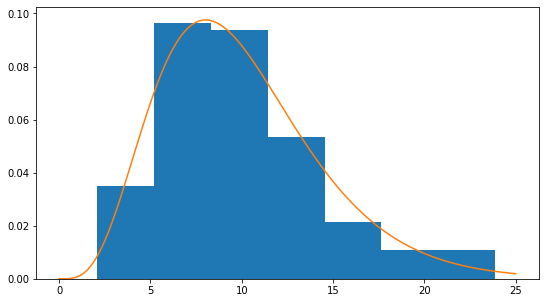

In [142]:
xlin = np.linspace(0,25,1000)
plt.figure(figsize=(9,5))
out2 = plt.hist(xx,l,density = True)
plt.plot(xlin,sc.chi2.pdf(xlin,xm))

#### Проверим гипотезу:

In [69]:
D = ((out2 - h*size*probs2)**2/(h*size*probs2)).sum()
print("Вывод: " + str(round(D,6)) + " (Статистика)" + " < " +\
"Верхняя квантиль: " + str(round(chi,2)) + " => принимаем гипотезу")

Вывод: 1.353595 (Статистика) < Верхняя квантиль: 9.49 => принимаем гипотезу
